## Dragon Real Estate - Price Prediction

In [1]:
import sklearn

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd, seaborn as sns

In [5]:
housingdata=pd.read_csv("data.csv")

In [6]:
housingdata.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,296,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,242,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,242,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,222,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,222,5.33,36.2


In [7]:
housingdata.shape

(506, 10)

In [8]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   RM      506 non-null    float64
 5   AGE     506 non-null    float64
 6   DIS     506 non-null    float64
 7   TAX     506 non-null    int64  
 8   LSTAT   506 non-null    float64
 9   MEDV    506 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 39.7 KB


## Check Missing Data in the attributes

In [9]:
housingdata.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
RM       0
AGE      0
DIS      0
TAX      0
LSTAT    0
MEDV     0
dtype: int64

In [10]:
housingdata.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,3.795043,408.237154,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,2.105710,168.537116,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,187.000000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,2.100175,279.000000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,3.207450,330.000000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,6.623500,94.075000,5.188425,666.000000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,711.000000,37.970000,50.000000


In [11]:
housingdata.min()

CRIM       0.00632
ZN         0.00000
INDUS      0.46000
CHAS       0.00000
RM         3.56100
AGE        2.90000
DIS        1.12960
TAX      187.00000
LSTAT      1.73000
MEDV       5.00000
dtype: float64

In [12]:
housingdata['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [13]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>],
       [<AxesSubplot: title={'center': 'CHAS'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>],
       [<AxesSubplot: title={'center': 'DIS'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'LSTAT'}>],
       [<AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

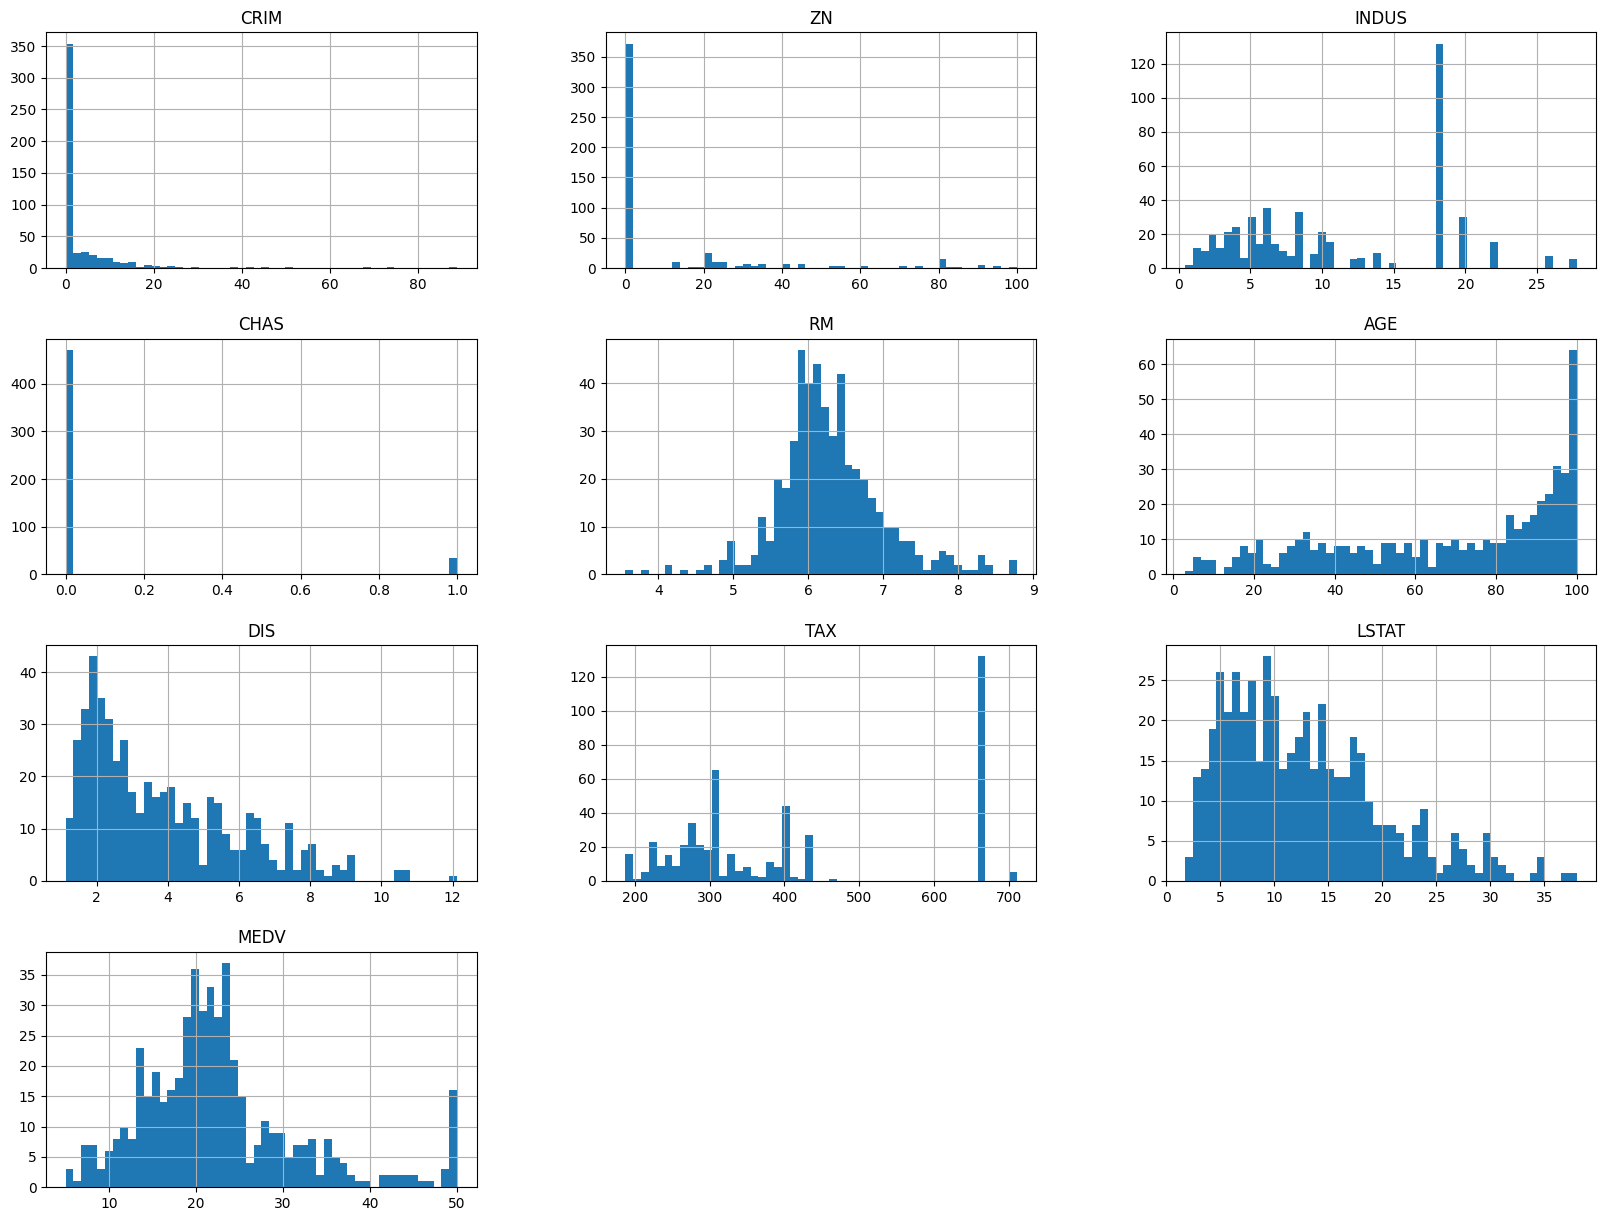

In [14]:
housingdata.hist(bins=50,figsize=(20,15))

## Train Test Spillting

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housingdata,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")
print(train_set,"\n",test_set)

Rows in train set: 404
Rows in test set: 102

         CRIM    ZN  INDUS  CHAS     RM   AGE     DIS  TAX  LSTAT  MEDV
477  15.02340   0.0  18.10     0  5.304  97.3  2.1007  666  24.91  12.0
15    0.62739   0.0   8.14     0  5.834  56.5  4.4986  307   8.47  19.9
332   0.03466  35.0   6.06     0  6.031  23.3  6.6407  304   7.83  19.4
423   7.05042   0.0  18.10     0  6.103  85.1  2.0218  666  23.29  13.4
19    0.72580   0.0   8.14     0  5.727  69.5  3.7965  307  11.28  18.2
..        ...   ...    ...   ...    ...   ...     ...  ...    ...   ...
106   0.17120   0.0   8.56     0  5.836  91.9  2.2110  384  18.66  19.5
270   0.29916  20.0   6.96     0  5.856  42.1  4.4290  223  13.00  21.1
348   0.01501  80.0   2.01     0  6.635  29.7  8.3440  280   5.99  24.5
435  11.16040   0.0  18.10     0  6.629  94.6  2.1247  666  23.27  13.4
102   0.22876   0.0   8.56     0  6.405  85.4  2.7147  384  10.63  18.6

[404 rows x 10 columns] 
          CRIM    ZN  INDUS  CHAS     RM    AGE     DIS  TAX  LS

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housingdata,housingdata['CHAS']):
    strat_train_set=housingdata.loc[train_index]
    strat_test_set=housingdata.loc[test_index]

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")
#print(strat_train_set,"\n",strat_test_set)

Rows in train set: 404
Rows in test set: 102



In [17]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    102 non-null    float64
 1   ZN      102 non-null    float64
 2   INDUS   102 non-null    float64
 3   CHAS    102 non-null    int64  
 4   RM      102 non-null    float64
 5   AGE     102 non-null    float64
 6   DIS     102 non-null    float64
 7   TAX     102 non-null    int64  
 8   LSTAT   102 non-null    float64
 9   MEDV    102 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 8.8 KB


In [18]:
print(strat_test_set['CHAS'].value_counts())

0    95
1     7
Name: CHAS, dtype: int64


In [19]:
print(strat_train_set['CHAS'].value_counts())

0    376
1     28
Name: CHAS, dtype: int64


In [20]:
housingdata = strat_train_set.copy()
#For a long data set not for a short data set

## Looking For Corelations

<AxesSubplot: >

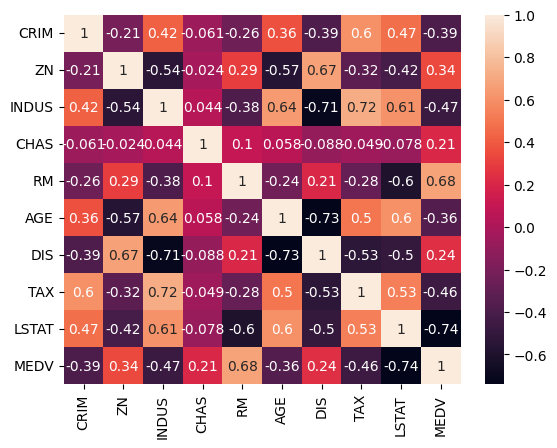

In [21]:
import seaborn as sns
corr_matrix=housingdata.corr()
sns.heatmap(data=corr_matrix,annot=True)

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV     1.000000
RM       0.679894
ZN       0.339741
DIS      0.240451
CHAS     0.205066
AGE     -0.364596
CRIM    -0.393715
TAX     -0.456657
INDUS   -0.473516
LSTAT   -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot: xlabel='CRIM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='TAX', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot: xlabel='CRIM', ylabel='RM'>,
        <AxesSubplot: xlabel='TAX', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='CRIM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='TAX', ylabel='LSTAT'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='CRIM'>,
        <AxesSubplot: xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot: xlabel='CRIM', ylabel='CRIM'>,
  

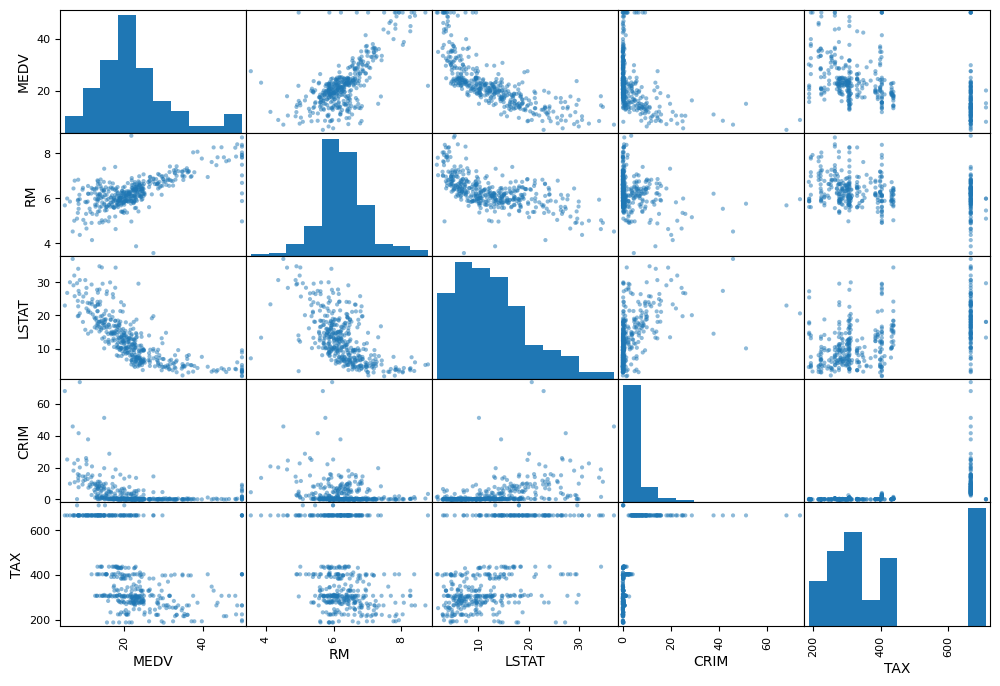

In [23]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM","LSTAT","CRIM","TAX"]
scatter_matrix(housingdata[attributes],figsize=(12,8))

<AxesSubplot: xlabel='TAX'>

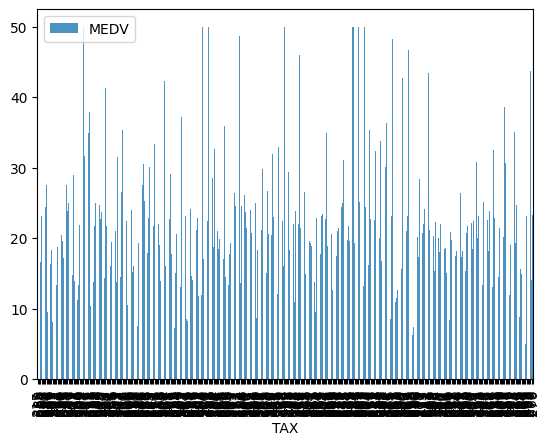

In [24]:
housingdata.plot(kind="bar",x="TAX",y="MEDV" , alpha=0.8)

## Trying Out Attributes combinations

In [25]:
housingdata= strat_train_set.drop("MEDV",axis=1)
housingdata_labels= strat_train_set["MEDV"].copy()

# Missing Attributes

In [26]:
# There are no missing Attributes.

#To Take Care Missing Attributes
#1. Get rid of the missing data points
#2. Get rid of the whole atttribute
#3. Set the value to some value(0,mean or median)

In [27]:
a=housingdata.dropna(subset=['RM'])
housingdata.shape

(404, 9)

In [28]:
print(housingdata.drop("RM",axis=1).shape) #Option1
median=housingdata["RM"].median() # Option2
print("Median is ",median)

(404, 8)
Median is  6.21


In [29]:
print("Standard Deviation is :",housingdata["RM"].std()) #Option3

Standard Deviation is : 0.7129832123342295


In [30]:
mode=housingdata["RM"].mode()

In [31]:
print(mode)

0    5.713
1    6.127
2    6.229
3    6.417
Name: RM, dtype: float64


In [32]:
mean=housingdata.mean()
print(mean)

CRIM       3.602814
ZN        10.836634
INDUS     11.344950
CHAS       0.069307
RM         6.279908
AGE       69.039851
DIS        3.746210
TAX      412.341584
LSTAT     12.791609
dtype: float64


In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housingdata)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_.shape

(9,)

In [35]:
X=imputer.transform(housingdata)

In [36]:
housing_tr=pd.DataFrame(X,columns=housingdata.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,6.279908,69.039851,3.746210,412.341584,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.712983,28.258248,2.099057,168.672623,7.235740
min,0.006320,0.000000,0.740000,0.000000,3.561000,2.900000,1.129600,187.000000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,5.878750,44.850000,2.035975,284.000000,6.847500
50%,0.286735,0.000000,9.900000,0.000000,6.210000,78.200000,3.122200,337.000000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,6.630250,94.100000,5.100400,666.000000,17.102500
max,73.534100,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,711.000000,36.980000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators  - It estimates some parameter based on a dataset. Eg. imputer . It has a fit method and transform method. Fot method - Fits the dataset and calculates internal parameters.
2. Transformers - Transform method takes input and returns output based on the learning form fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors  -  LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling
Primarily, two types of features scaling methods:
1. Min-Max scaling    (Normalization)
   (value - min)/(max - min)
   Sklearn provides a class called MinMaxScalar for this.
2. Standardization 
    (value - mean)/std(standard deviation)
    Sklearn provides a class called StandardScalar for this
    

## Creating a Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from subprocess import check_output
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#    ......... add as many you want in your pipeline
    ('std_scalar', StandardScaler()), 
])

In [39]:
housing_num_tr=my_pipeline.fit_transform(housingdata)

In [40]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  2.61111401,
        -0.5778192 , -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ...,  2.19312325,
        -0.78557904, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ..., -0.68730678,
         1.50571521,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.11973036,
        -0.80932303, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -0.62505892,
         1.50571521,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.30246717,
        -0.80932303,  0.09940681]])

In [41]:
housing_num_tr.shape

(404, 9)

## Selecting a desired model for Dragon Real Estates

In [42]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LogisticRegression
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators=100)
m=model.max_features
print(m)
#model=LogisticRegression(random_state=1)
model.fit(housing_num_tr,housingdata_labels)
#model.fit(housing_num_tr,housing_labels)

1.0


RandomForestRegressor()

In [43]:
some_data = housingdata.iloc[:5]

In [44]:
some_labels = housingdata_labels.iloc[:5]

In [45]:
prepared_data= my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([22.479, 25.35 , 15.967, 23.342, 23.527])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [48]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
RF_mse = mean_squared_error(housingdata_labels, housing_predictions)
RF_rmse=np.sqrt(RF_mse)

In [49]:
RF_rmse

1.3285800225193902

## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housingdata_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores)

[3.32927653 3.26299707 5.13370455 2.57742004 3.40921456 3.0298132
 4.62763574 3.48097221 3.40536493 3.35726848]


In [51]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [52]:
print_scores(rmse_scores)

Scores : [3.32927653 3.26299707 5.13370455 2.57742004 3.40921456 3.0298132
 4.62763574 3.48097221 3.40536493 3.35726848]
Mean : 3.561366731393516
Standard Deviation : 0.7140288933223026


## Saving the Model

In [53]:
from joblib import dump, load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [54]:
X_test= strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.308 11.737 25.075 21.606 17.942 15.27  19.988 13.983 32.05  41.598
 19.812 13.493 23.978 26.61  19.84  13.202 31.097 15.33  23.53  17.577
 19.575 17.873 20.672 21.125 20.716 32.805 15.7   33.311  9.881 33.283
 24.696 21.459 22.846  9.654 21.025 11.304 42.522 23.999 24.12  42.859
 24.061 29.69  20.558 20.643 19.655 33.011 45.209 20.308 20.193 21.625
 21.034 14.564 21.866 14.175 24.395 33.082 44.322 29.167 20.47  21.099
 47.791 12.793 19.029 24.898 13.523 32.594 20.165 16.347 19.035 35.409
 25.94  22.538 20.656 22.655 33.86  13.329 15.19  19.584 20.805 21.314
 22.397 21.505 14.204 22.23  20.225 21.363 14.424 21.793 21.956 23.342
 18.392 27.556  7.847 26.558 18.058 27.929 19.172 30.988 15.567 26.473
 21.581 20.341] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [55]:
print("Final Mean Square Error is : ",final_mse)
print("Final Root Mean Square Error is : ",final_rmse)

Final Mean Square Error is :  9.720689784313722
Final Root Mean Square Error is :  3.1178020758723157


In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -0.24141041,
       -1.31238772,  2.61111401, -0.5778192 , -0.86091034])

In [57]:
import numpy as np
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -0.24141041,
       -1.31238772,  2.61111401, -0.5778192 , -0.86091034]])
model.predict(features)

array([22.479])

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(housingdata['MEDV'],bins=2000)
plt.show()

KeyError: 'MEDV'

<AxesSubplot: >

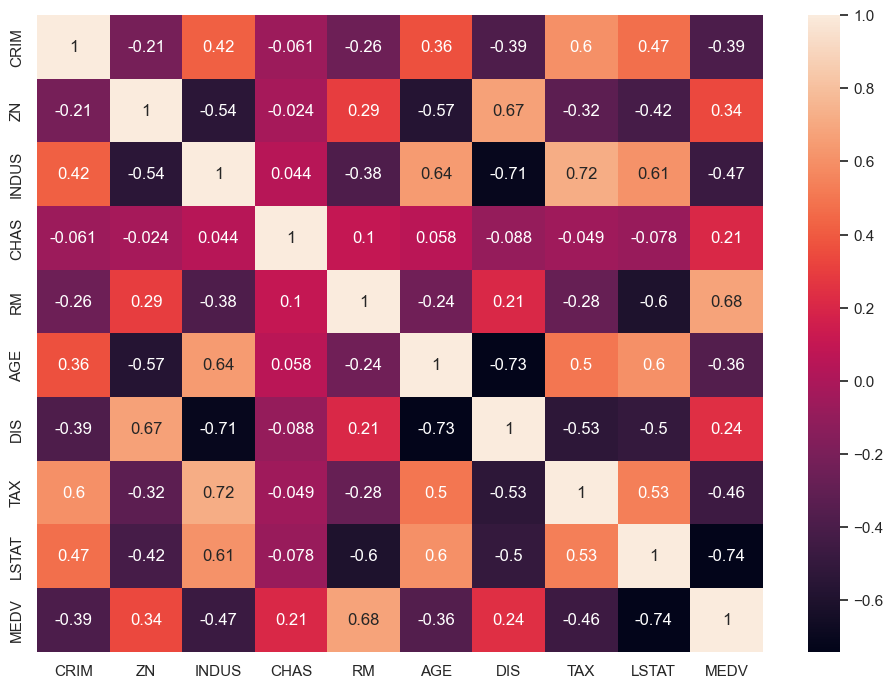

In [60]:
sns.heatmap(data=corr_matrix,annot=True)